# Roteiro de trabalho

### Tempos dos vídeos
- (IT) Insulina Tradicional (15:00) $\rightarrow$ 900 segundos
- (GT) Glucagon Tradicional (14:57) $\rightarrow$ 897 segundos
- (IA) Insulina Ativa (19:26) $\rightarrow$ 1166 segundos
- (GA) Glucagon Ativa (20:43) $\rightarrow$ 1243 segundos

### Participante deste roteiro:
- Daniella: IT e GA

In [46]:
# imports de bibliotecas

import numpy as np
import mne
from scipy.signal import welch
import matplotlib.pyplot as plt

In [47]:
# definição do info (MNE)

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")

<Info | 8 non-empty values
 bads: []
 ch_names: F3, Fz, F4, C3, Cz, C4, P3, P4
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

In [48]:
# aula -> 99750 até 296500 (ga1) | 5250 até 119250 (ga2) [1243 segundos]
# teste -> 126750 até 158000 (ga2) [125 segundos]
ga = ['datasets/Daniella Sehaber/Glucagon Ativo/OpenBCI-RAW-2023-10-26_12-43-47.txt',
      'datasets/Daniella Sehaber/Glucagon Ativo/OpenBCI-RAW-2023-10-26_13-06-25.txt']
ga_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in ga]
data_ga = np.concatenate((ga_ob[0][99750:296501,:], ga_ob[1][5250:119250,:]))
data_ga_test = ga_ob[1][126750:158001,:]


# aula -> 48250 até 162000 (it1) | 500 até 111750 (it2) [900 segundos]
# teste -> 119250 até 162000 (it2) [171 segundos]
it = ['datasets/Daniella Sehaber/Insulina Tradicional/OpenBCISession_2023-10-05_13-27-17 dani teste 2/OpenBCI-RAW-2023-10-05_13-28-15.txt',
      'datasets/Daniella Sehaber/Insulina Tradicional/OpenBCISession_2023-10-05_13-43-50 dani test 2 part 2/OpenBCI-RAW-2023-10-05_13-44-46.txt']
it_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in it]
data_it = np.concatenate((it_ob[0][48250:162001,:], it_ob[1][500:111750,:]))
data_it_test = it_ob[1][119250:162001,:]

# 26250 até 152250 [504 segundos]
test = 'datasets/Daniella Sehaber/Teste final/OpenBCI-RAW-2023-11-28_15-22-35.txt'
test_ob = np.loadtxt(test, delimiter=',', skiprows=5, usecols=range(1, 9))
data_test = test_ob[26250:152251,:]


X = {
      'ga': mne.io.RawArray(data_ga.T, info),
      'ga_test': mne.io.RawArray(data_ga_test.T, info),
      'it': mne.io.RawArray(data_it.T, info),
      'it_test':mne.io.RawArray(data_it_test.T, info),
      'test':mne.io.RawArray(test_ob.T, info)
}

Creating RawArray with float64 data, n_channels=8, n_times=310751
    Range : 0 ... 310750 =      0.000 ...  1243.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=31251
    Range : 0 ... 31250 =      0.000 ...   125.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=225001
    Range : 0 ... 225000 =      0.000 ...   900.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=42751
    Range : 0 ... 42750 =      0.000 ...   171.000 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=152301
    Range : 0 ... 152300 =      0.000 ...   609.200 secs
Ready.


In [49]:
# filtragem de todos os dados

for key in X:
    X[key].notch_filter(freqs=60)
    X[key].filter(l_freq=4, h_freq=100)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 413 samples (1.652 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband

In [50]:
print(X['ga'].n_times)
print(X['ga'].times[-1])

310751
1243.0


In [51]:
from scipy.signal import welch
import numpy as np

sr = 250            # Sampling rate
jump = 5            # 5 seconds of buffer
size = sr * jump    # Number of points evaluated

# Define frequency band limits (in Hz)
theta_band = (4, 8)       # Theta: 4 - 8 Hz
alpha_band = (8, 13)      # Alpha: 8 - 13 Hz
beta_band = (13, 30)      # Beta: 13 - 30 Hz
gamma_band = (30, 100)    # Gamma: 30 - 100 Hz

total_pc = {}
data_names = ['ga', 'ga_test', 'it', 'it_test', 'test']
datas = [X['ga'], X['ga_test'], X['it'], X['it_test'], X['test']]

# Apply filters and average reference before the loop
for k, data in enumerate(datas):

    results = [0, 0, 0, 0]

    for i in range(0, data.n_times, 125):
        if i + size < data.n_times:
            cut = data.copy().crop(tmin=data.times[i], tmax=data.times[i] + jump)
        else:
            cut = data.copy().crop(tmin=data.times[i], tmax=data.times[-1])
        
        cut.set_eeg_reference(ref_channels='average')
        cut = cut.get_data()

        print("Shape of cut:", cut.shape)  # Check the shape of cut

        # Adjust nperseg and noverlap if necessary
        nperseg = min(32, cut.shape[1])
        noverlap = min(16, nperseg - 1)  # Ensure noverlap < nperseg

        # Compute PSD using Welch's method
        freqs, psd = welch(cut, fs=sr, nperseg=nperseg, noverlap=noverlap)
        
        # Average the PSD across all electrodes
        X = np.mean(psd, axis=0)

        # Find the indices corresponding to the frequencies of interest
        theta_idxs = np.where((freqs >= theta_band[0]) & (freqs <= theta_band[1]))[0]
        alpha_idxs = np.where((freqs >= alpha_band[0]) & (freqs <= alpha_band[1]))[0]
        beta_idxs = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]
        gamma_idxs = np.where((freqs >= gamma_band[0]) & (freqs <= gamma_band[1]))[0]

        # Calculate the power in each frequency band
        bands = [np.sum(X[theta_idxs]), np.sum(X[alpha_idxs]), np.sum(X[beta_idxs]), np.sum(X[gamma_idxs])]
        # Count the segment in the band with the highest power
        results[np.argmax(bands)] += 1

    total = sum(results)
    percentages = [round((count/total) * 100, 2) for count in results]
    total_pc[data_names[k]] = percentages

print(total_pc)
    

EEG channel type selected for re-referencing


Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Shape of cut: (8, 1251)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) 

In [52]:
from matplotlib import rcParams

rcParams['figure.figsize'] = [6., 4.]

def plot_bar(x):
    colors = ('orange', 'green', 'blue', 'purple')
    bars = plt.bar(('theta', 'alpha', 'beta', 'gamma'), x, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(X.keys(data)) + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.title('Porcentagem da potência em cada banda de frequência')
    plt.xlabel('Banda de Frequência')
    plt.ylabel('Porcentagem durante a atividade')

    # Exibir o gráfico
    plt.show()

Glucagon Ativa


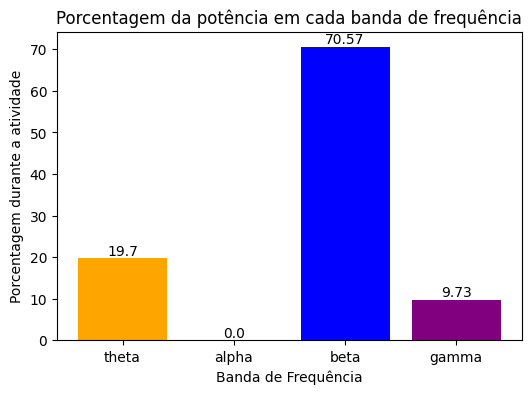

Glucagon Ativa - Teste


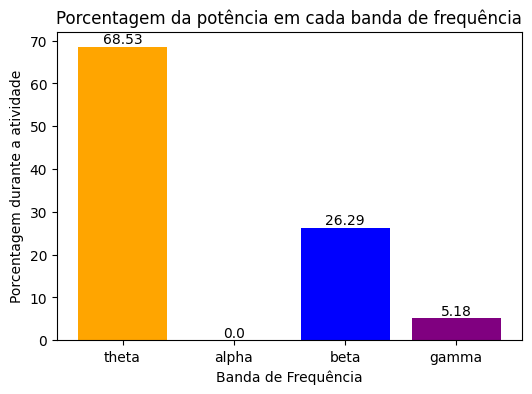

Insulina Ativa


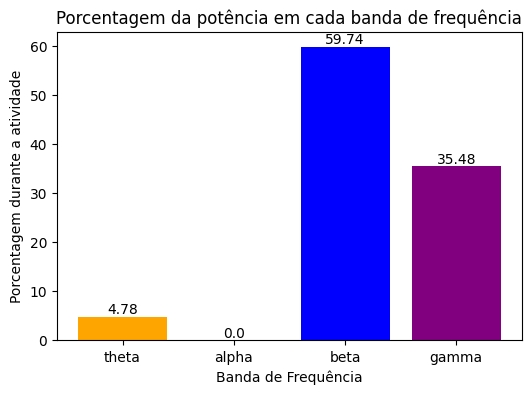

Insulina Ativa - Teste


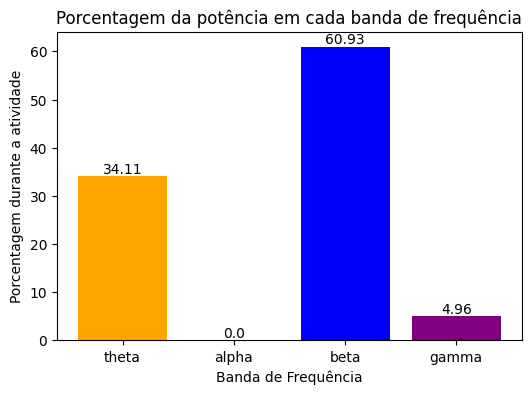

Teste Final


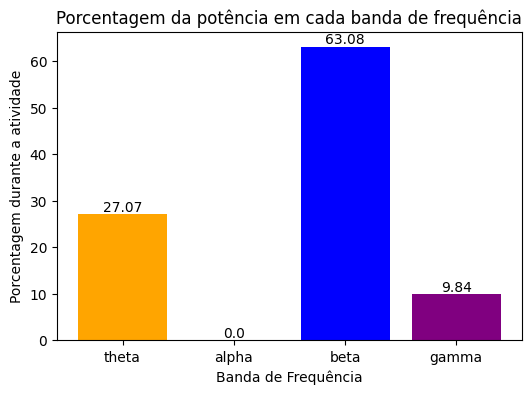

In [53]:
rcParams['figure.figsize'] = [6., 4.]

def plot_bar(x):
    colors = ('orange', 'green', 'blue', 'purple')
    bars = plt.bar(('theta', 'alpha', 'beta', 'gamma'), x, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.title('Porcentagem da potência em cada banda de frequência')
    plt.xlabel('Banda de Frequência')
    plt.ylabel('Porcentagem durante a atividade')

    # Exibir o gráfico
    plt.show()

print('Glucagon Ativa')
plot_bar([total_pc['ga'][0], total_pc['ga'][1], total_pc['ga'][2], total_pc['ga'][3]])
print('Glucagon Ativa - Teste')
plot_bar([total_pc['ga_test'][0], total_pc['ga_test'][1], total_pc['ga_test'][2], total_pc['ga_test'][3]])
print('Insulina Ativa')
plot_bar([total_pc['it'][0], total_pc['it'][1], total_pc['it'][2], total_pc['it'][3]]) 
print('Insulina Ativa - Teste')
plot_bar([total_pc['it_test'][0], total_pc['it_test'][1], total_pc['it_test'][2], total_pc['it_test'][3]])
print('Teste Final')
plot_bar([total_pc['test'][0], total_pc['test'][1], total_pc['test'][2], total_pc['test'][3]])

Tarefa 2: Observar por meio dos códigos, os 3 principais rítmos de interesse (Theta, Beta e Gama), com tempos mais específicos do experimento. Ou seja, até o momento, observamos as porcentagens olhando para todo experimento. Então mesmo obtendo um valor de Beta às vezes baixo, em algum momento considerável da aula assistida, ele pode estar alto. Faça uma análise mais detalhada desses momentos.

Mostre também gráficos no domínio da frequência e/ou espectrograma.

Observação: Para descobrir os segmentos de interesse, deve-se analisar os dados diretamente no software OpenBCI GUI. Posteriormente, pegue os mesmas faixas de tempo, e realize os recortes no código em python para constar a prova de conceito.


### Plotando espectograma para ondas beta na glucagon ativa
Na celula abaixo, foi feita uma função que aplica o filtro passa baixa para remover ruídos e então plota o espectograma
com base nos tempos de 12 minutos e 15 segundos até 15 minutos, feito para provar que o voluntário possuiu beta em maior parte do tempo. 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, butter, lfilter

def bandpass_filter(data, low_freq, high_freq, fs):
    nyquist = 0.5 * fs
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

# Função para calcular e plotar o espectrograma da banda Theta
def plot_espectograma(data, fs, title):
    # Selecionar o primeiro canal para o espectrograma
    channel_data = data[0]  # Escolha o canal desejado (0 é o primeiro canal)
    
    # Se o dado for multidimensional, escolher um segmento
    if channel_data.ndim > 1:
        channel_data = channel_data[:, 0]  # Pegue o primeiro canal de todos os dados

    # Aplicar o filtro passa-banda para a banda Beta (13-32 Hz)
    dados_beta = bandpass_filter(channel_data, 32, 100, fs)
    
    plt.figure(figsize=(12, 6))
    f, t, Sxx = spectrogram(dados_beta, fs=fs, nperseg=256)
    
    # Ajustar para garantir que o formato de Sxx é o esperado
    if Sxx.ndim == 2:
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.title(f'Espectograma - gamma 32-100(hz) - {title}')
        plt.ylabel('Frequencia (Hz)')
        plt.xlabel('Tempo (s)')
        plt.colorbar(label='Intensidade (uV)')
        plt.ylim([4, 8])  # Limitar o eixo y para a banda Theta
        plt.show()
    else:
        print('Erro: Dimensões inesperadas para Sxx')

# Definir os intervalos de tempo para extração de dados
start_time = 12 * 60 + 15  # 8:15 em segundos
end_time = 15 * 60 + 2    # 9:02 em segundos

# Convertendo o tempo para índices de amostra
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Extrair o segmento de dados de interesse
#data_ga = X['ga'].get_data(start=start_sample, stop=end_sample)
data_ga_test = X['ga_test'].get_data(start=start_sample, stop=end_sample)
#data_it = X['it'].get_data(start=start_sample, stop=end_sample)
#data_it_test = X['it_test'].get_data(start=start_sample, stop=end_sample)
#data_test = X['test'].get_data(start=start_sample, stop=end_sample)

# Plotar o espectrograma da banda Theta para cada conjunto de dados
print('Glucagon Ativa')
plot_espectograma(data_ga, fs=sr, title='Glucagon Ativa')



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices